In [1]:
import yfinance as yf
import datetime
from datetime import timedelta
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Importing data
def get_data(symbol, days, interval='1d'):
    end_date = datetime.datetime.today()
    start_date = end_date - timedelta(days=days)
    
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return data

In [3]:
def returns(dataframe, periods=1):
    dataframe['returns'] = dataframe['Adj Close'].pct_change(periods=periods)
    return dataframe

In [30]:
def return_options(prices, Ks, range_begin, range_end, option_types, stock_price=0, plot = True):
    x_axes = np.arange(range_begin, range_end, 0.01)
    net_return = np.zeros_like(x_axes)  # Initialize net return array (absolute values)

    for price, K, option_type in zip(prices, Ks, option_types):
        y_axes = []
        for i in x_axes:
            if option_type == 'call':
                if price >= 0:  # Buying call
                    if K <= i:
                        y_axes.append((i - K) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                else:  # Selling call
                    if K <= i:
                        y_axes.append((K - i) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
            else:  # Put option
                if price >= 0:  # Buying put
                    if K >= i:
                        y_axes.append((K - i) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                else:  # Selling put
                    if K >= i:
                        y_axes.append((i - K) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                        
        net_return += np.array(y_axes)

        if stock_price != 0:
            stock_ret = x_axes - stock_price
            net_return += stock_ret  # Aggregate net return (absolute values)
    
    if plot:
        # Plot the net return in dollars
        plt.figure(figsize=(6, 6))
        plt.plot(x_axes, net_return, color='blue', label='Net Return')
        plt.xlabel('Underlying Price')
        plt.ylabel('Net Option Return')
        plt.title('Net Return of Options')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        return(pd.DataFrame({'X-axes': x_axes, 'Net Return': net_return}))

In [5]:
# Going for average return in 30 days, so 30 days untill expiration
data = get_data("BFIT.AS", 2560)
data = returns(data, 30)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2017-09-15,17.635000,17.764999,17.400000,17.764999,17.764999,65551,NaN
2017-09-18,17.780001,17.780001,17.105000,17.594999,17.594999,25449,NaN
2017-09-19,17.535000,18.190001,17.500000,17.855000,17.855000,83015,NaN
2017-09-20,17.780001,17.905001,17.559999,17.605000,17.605000,32004,NaN
2017-09-21,17.475000,17.790001,17.400000,17.760000,17.760000,33978,NaN
...,...,...,...,...,...,...,...
2024-09-12,22.020000,22.080000,21.740000,21.959999,21.959999,87679,0.000000
2024-09-13,21.900000,22.820000,21.900000,22.639999,22.639999,77401,0.041398
2024-09-16,22.580000,22.740000,22.080000,22.080000,22.080000,46547,0.008219


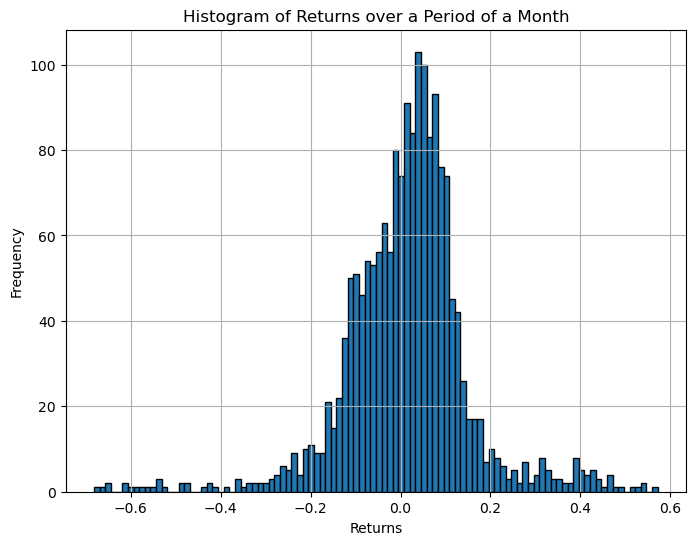

Date
2017-10-27    0.097664
2017-10-30    0.113669
2017-10-31    0.104173
2017-11-01    0.114172
2017-11-02    0.107827
                ...   
2024-09-12    0.000000
2024-09-13    0.041398
2024-09-16    0.008219
2024-09-17    0.033698
2024-09-18    0.016290
Name: returns, Length: 1765, dtype: float64


In [6]:
returns_data = data['returns'].dropna()

bins = 100

# Create a histogram of the returns
plt.figure(figsize=(8, 6))
plt.hist(returns_data, bins=bins, edgecolor='black')
plt.title('Histogram of Returns over a Period of a Month')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(returns_data)

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0.5, 1.0, 'nct(df=2.82, nc=-0.19, loc=0.04, scale=0.09)')

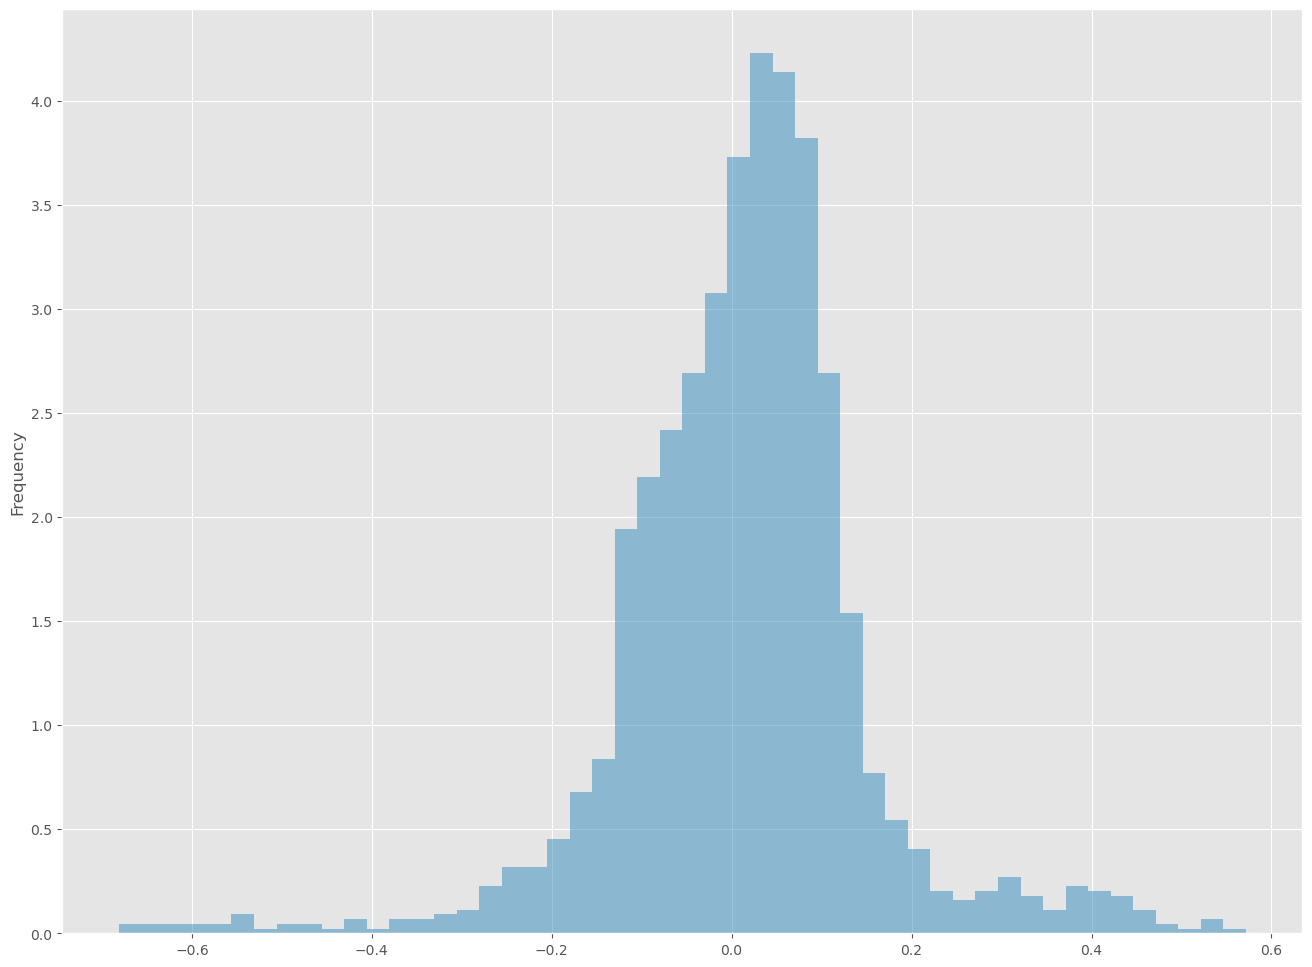

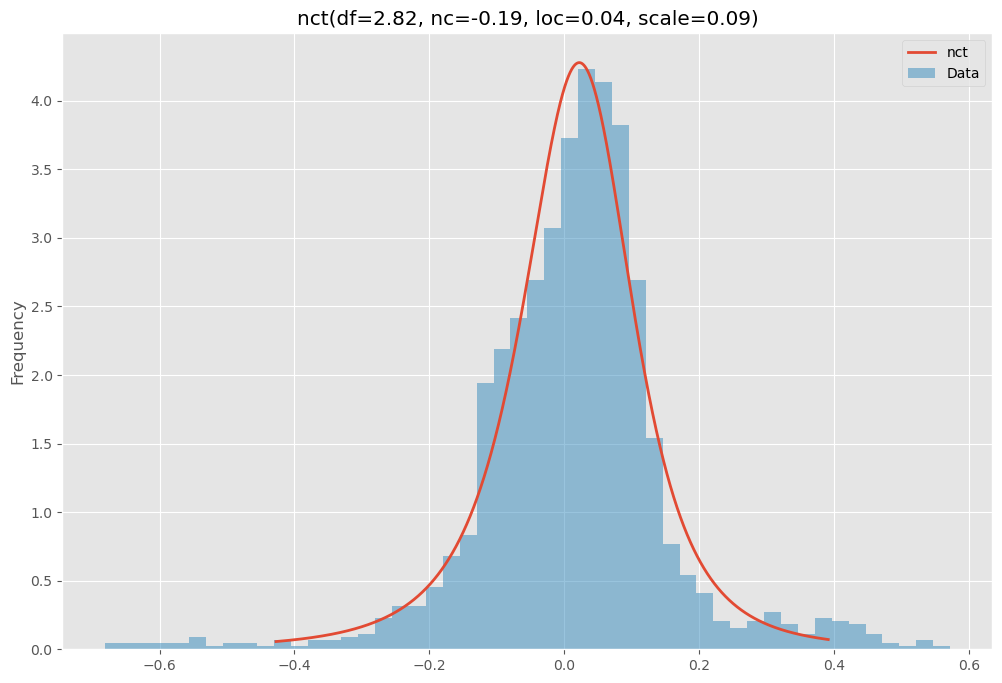

In [7]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


ax = returns_data.plot(kind='hist', bins=50, density=True, label = "Data",alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(returns_data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label=best_dist[0].name, legend=True)
returns_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label="Data", legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(dist_str)

In [62]:
#covered call case (strike and premium made up because of lack of data)
stock_price = data['Close'].iloc[-1]
premium = [-0.5]
prem = -0.5
K = [23.5]
types = ['call']
lower = 20
upper = 27
table = return_options(premium, K, lower, upper, types, stock_price, plot = False)
table['stock_return'] = table['X-axes'] / stock_price - 1

# Define the parameters for the Laplace asymmetric distribution
from scipy.stats import nct
df = 2.83
nc = -0.19
loc = 0.04
scale = 0.09

# Compute the probability density for each stock return
table['probability'] = nct.pdf(table['stock_return'], df=df, nc=-0.19, loc=loc, scale=scale)
table['probability'] = table['probability']/sum(table['probability'])

table['expected value'] = table['probability'] * table['Net Return']
print(table)

     X-axes  Net Return  stock_return  probability  expected value
0     20.00   -1.959999     -0.109528     0.000771       -0.001510
1     20.01   -1.949999     -0.109083     0.000775       -0.001511
2     20.02   -1.939999     -0.108638     0.000779       -0.001511
3     20.03   -1.929999     -0.108192     0.000783       -0.001511
4     20.04   -1.919999     -0.107747     0.000787       -0.001511
..      ...         ...           ...          ...             ...
695   26.95    1.540001      0.199911     0.000411        0.000633
696   26.96    1.540001      0.200356     0.000408        0.000629
697   26.97    1.540001      0.200801     0.000406        0.000625
698   26.98    1.540001      0.201247     0.000403        0.000621
699   26.99    1.540001      0.201692     0.000401        0.000618

[700 rows x 5 columns]


In [63]:
#Expected ROI on covered call
ROI_covvcall = (sum(table['expected value'])/(stock_price+prem)) * 100

#Expected ROI of stock holding
ROI_stock = sum(table['probability']*table['stock_return'])*100

print(f"ROI on covered call holding: {round(ROI_covvcall,2)}%")
print(f"ROI on stock holding: {round(ROI_stock,2)}%")

ROI on covered call holding: 3.15%
ROI on stock holding: 3.23%


In [64]:
# Get the maximum Net Return
max_covvcallreturn = table['Net Return'].loc[table['Net Return'].idxmax()]
return_covvcallhit = max_covvcallreturn/(stock_price+prem) * 100

# Filter rows where Net Return equals the maximum Net Return
max_return_rows = table[table['Net Return'] == max_covvcallreturn]

# Sum the probabilities for these rows
probability_of_occurence = max_return_rows['probability'].sum()

# Calculate the absolute difference between Net Return and zero
table['abs_diff_from_zero'] = table['Net Return'].abs()

# Find the minimum difference
min_diff = table['abs_diff_from_zero'].min()

# Filter rows where the absolute difference is equal to the minimum difference (i.e., closest to zero)
zero_net_return_rows = table[table['abs_diff_from_zero'] == min_diff]

# Extract the value for the downside calculation and stock price
downside = (zero_net_return_rows['X-axes'].values[0] / stock_price) - 1
breakeven_stock_price = zero_net_return_rows['X-axes'].values[0]

# Filter the rows where Net Return is less than zero (negative return)
negative_return_rows = table[table['Net Return'] < 0]

# Sum the probabilities for these rows
probability_of_negative_return = negative_return_rows['probability'].sum()

#Probability for negative stock return
negative_stock_return = table[table['stock_return']<0]
prob_neg_stock_return = sum(negative_stock_return['probability'])

print(f"Current stock price: {round(stock_price,2)}")
print("\n")
print(f"Probability of occurrence of call getting exercised: {round(probability_of_occurence*100,2)}%, this is at stock price of: {round(max_return_rows['X-axes'].values[0],2)}")
print(f"Maximum return of covered call strategy: {round(return_covvcallhit,2)}%")
print("\n")
print(f"Downside protection for break even: {round(downside * 100, 2)}%, which is at stock price of: {round(breakeven_stock_price,2)}")
print(f"Total probability of obtaining a negative return on covered call: {round(probability_of_negative_return*100,2)}%")
print(f"Total probability of obtaining a negative return on stock holding: {round(prob_neg_stock_return*100,2)}%")

Current stock price: 22.46


Probability of occurrence of call getting exercised: 41.82%, this is at stock price of: 23.5
Maximum return of covered call strategy: 7.01%


Downside protection for break even: -2.23%, which is at stock price of: 21.96
Total probability of obtaining a negative return on covered call: 25.13%
Total probability of obtaining a negative return on stock holding: 35.17%


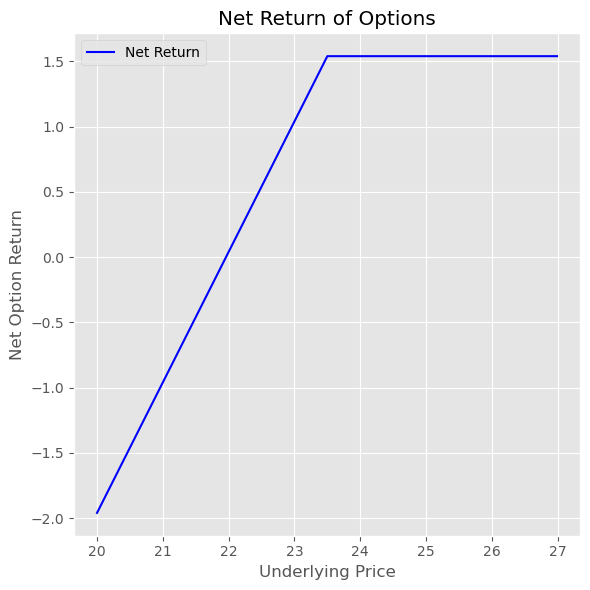

In [66]:
#Demonstration option function (covered call position)
return_options(premium, K, lower, upper, types ,stock_price, plot = True)

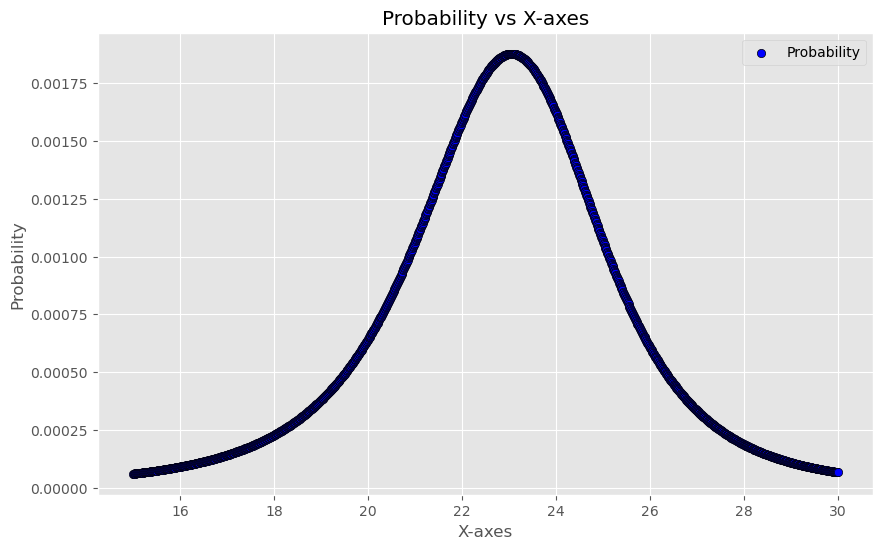

In [15]:
# Plot expected value against X-axes as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['X-axes'], table['probability'], color='b', label='Probability', edgecolor='k')
plt.xlabel('X-axes')
plt.ylabel('Probability')
plt.title('Probability vs X-axes')
plt.grid(True)
plt.legend()
plt.show()

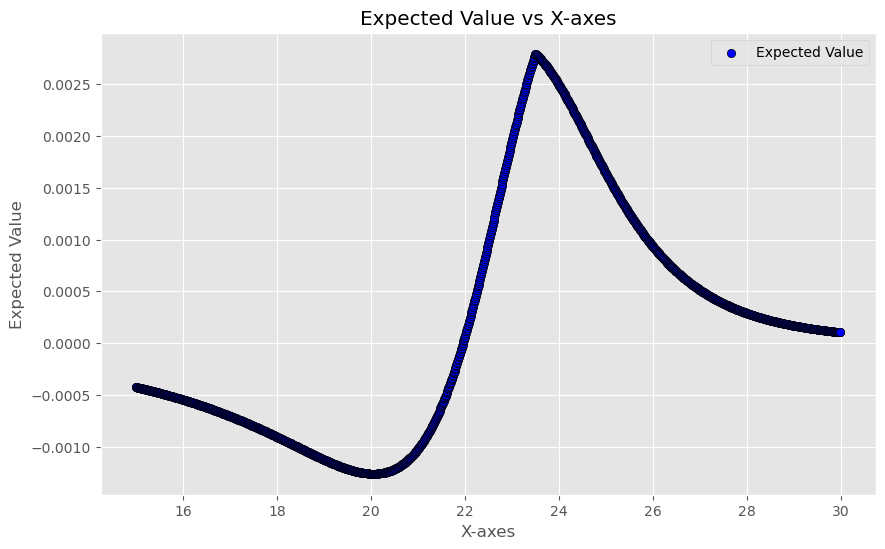

In [16]:
# Plot expected value against X-axes as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['X-axes'], table['expected value'], color='b', label='Expected Value', edgecolor='k')
plt.xlabel('X-axes')
plt.ylabel('Expected Value')
plt.title('Expected Value vs X-axes')
plt.grid(True)
plt.legend()
plt.show()